In [60]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
import seaborn as sb
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import env
import wrangle_reg as wr
import warnings
warnings.filterwarnings("ignore")
import os

## Exercises



1. Load the tips dataset.

    a. Create a column named price_per_person. This should be the total bill divided by the party size.
    b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?
    c. Use select k best to select the top 2 features for predicting tip amount. What are they?
    d. Use recursive feature elimination to select the top 2 features for tip amount. What are they?
    e. Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features you are selecting?



In [61]:
tips = data('tips')

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
1         16.99  1.01  Female     No   Sun  Dinner     2
2         10.34  1.66    Male     No   Sun  Dinner     3
3         21.01  3.50    Male     No   Sun  Dinner     3
4         23.68  3.31    Male     No   Sun  Dinner     2
5         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
240       29.03  5.92    Male     No   Sat  Dinner     3
241       27.18  2.00  Female    Yes   Sat  Dinner     2
242       22.67  2.00    Male    Yes   Sat  Dinner     2
243       17.82  1.75    Male     No   Sat  Dinner     2
244       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [64]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [65]:
# Create groups for categorical and muneric columns
cats = ['time', 'sex', 'smoker', 'day']
nums= ['total_bill', 'tip', 'size']

#### Exercise 1 
a. Create a column named price_per_person.

In [66]:
tips['price_per_person'] = tips['total_bill']/ tips['size']

In [67]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

In [68]:
# I need to take a look and check for correlation
tips.corr()

,total_bill,tip,size,price_per_person
total_bill,1.000000,0.675734,0.598315,0.647497
tip,0.675734,1.000000,0.489299,0.347393
size,0.598315,0.489299,1.000000,-0.175412
price_per_person,0.647497,0.347393,-0.175412,1.000000


In [69]:
# It looks like there's heavy correlation between tips amount and total_bill


In [70]:
sb.relplot(data=tips)

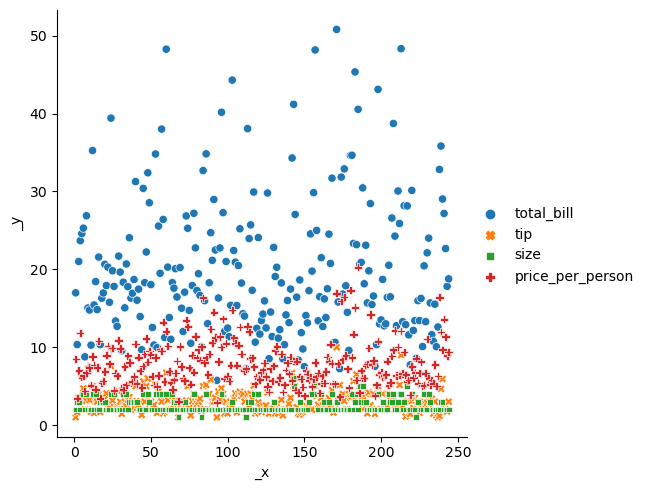

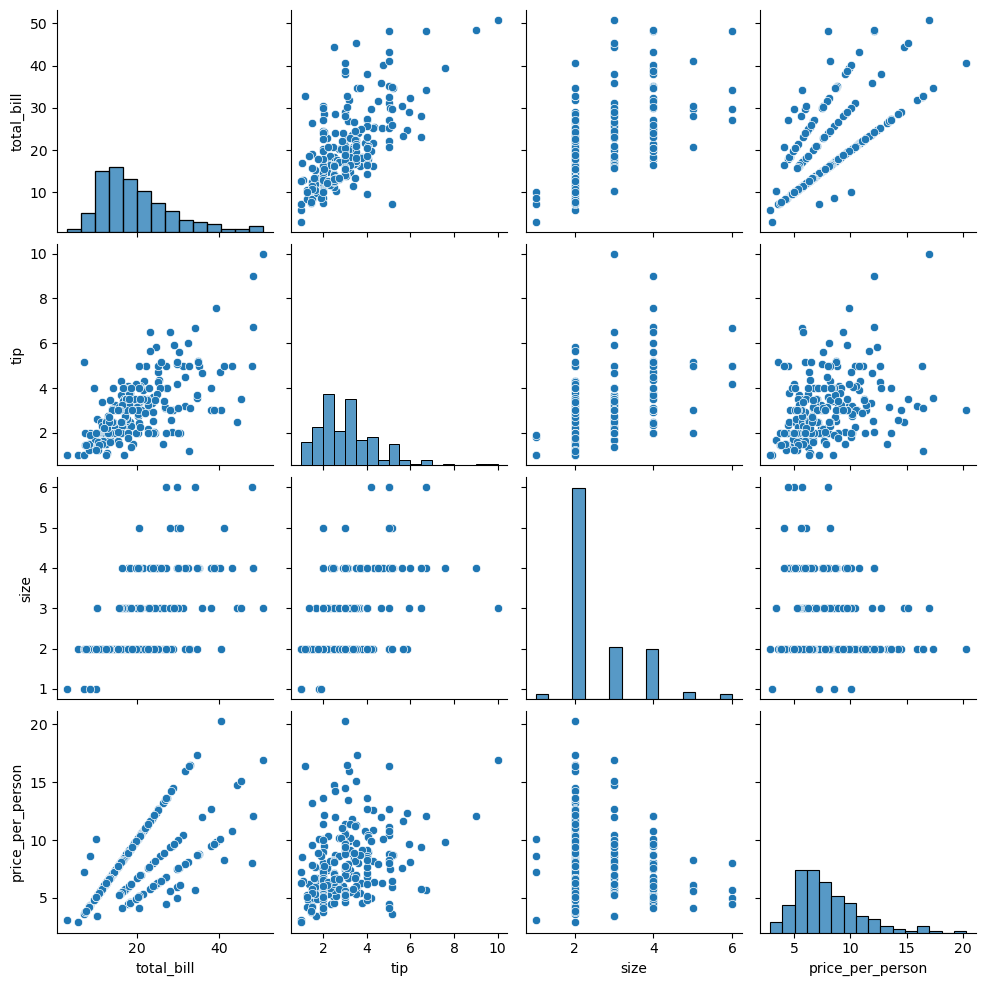

In [71]:
sb.pairplot(data=tips)
plt.show()

In [72]:
# Adding my ppp to my numerical group
nums.append('price_per_person')

In [73]:
nums

['total_bill', 'tip', 'size', 'price_per_person']

c. Use select k best to select the top 2 features for predicting tip amount. What are they?

In [74]:
#Split my data

train_val, test = train_test_split(tips, test_size=.2, random_state=123)
train, val = train_test_split(train_val, 
                                   test_size=.3, 
                                   random_state=123)

In [75]:
train.shape

(136, 8)

In [76]:
nums

['total_bill', 'tip', 'size', 'price_per_person']

In [77]:
#Drop my target variable ('tip') from my nums group
X_train= tips[nums].drop(columns='tip')
y_train= tips['tip']

In [78]:
X_train

,total_bill,size,price_per_person
1,16.99,2,8.495000
2,10.34,3,3.446667
3,21.01,3,7.003333
4,23.68,2,11.840000
5,24.59,4,6.147500
...,...,...,...
240,29.03,3,9.676667
241,27.18,2,13.590000
242,22.67,2,11.335000
243,17.82,2,8.910000


In [79]:
#### SelectKBest

f_selector= SelectKBest(f_regression, k=2)

In [80]:
# Fit f_Selector to my x & y train

f_selector.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7ff3ab40e670>)

In [81]:
# get list of top K features. 
f_feature = X_train.columns[f_selector.get_support()]

In [82]:
f_feature

Index(['total_bill', 'size'], dtype='object')

d. Use recursive feature elimination to select the top 2 features for tip amount. 

In [83]:
#RFE

lr = LinearRegression()

# creates RFE object, indicates the number of features I'm looking for
rfe= RFE(lr, n_features_to_select=2)

# fit the RFE with train data
fit =rfe.fit(X_train, y_train)

In [84]:
rfe_feature= X_train.columns[rfe.get_support()]

In [85]:
rfe_feature

Index(['total_bill', 'price_per_person'], dtype='object')

#### Exercise 2
Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [86]:
def select_kbest(X, y, k=2):
    """ X: df of independent features
        y: target
        k: number of kbest features to select. defaulted to 2, but can be changed)"""
    
 # make
    kbest= SelectKBest(f_regression, k=k)
    
 # fit
    kbest.fit(X, y)
 # get support
    mask = kbest.get_support()
    return X.columns[mask]

In [87]:
select_kbest(X_train, y_train, k=2)

Index(['total_bill', 'size'], dtype='object')

#### Exercise 3
Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [88]:
def rfe(X, y, k=2):
    """ X: df of independent features
        y: target
        k: number of kbest features to select. defaulted to 2, but can be changed)"""     
 # make
    rfe= RFE(LinearRegression(), n_features_to_select=k)
    
 # fit
    rfe.fit(X, y)
 # get support
    mask = rfe.get_support()
    return X.columns[mask]

In [89]:
rfe(X_train, y_train, k=2)

Index(['total_bill', 'price_per_person'], dtype='object')

#### Exercise 4
Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [90]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


In [91]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [92]:
swiss.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

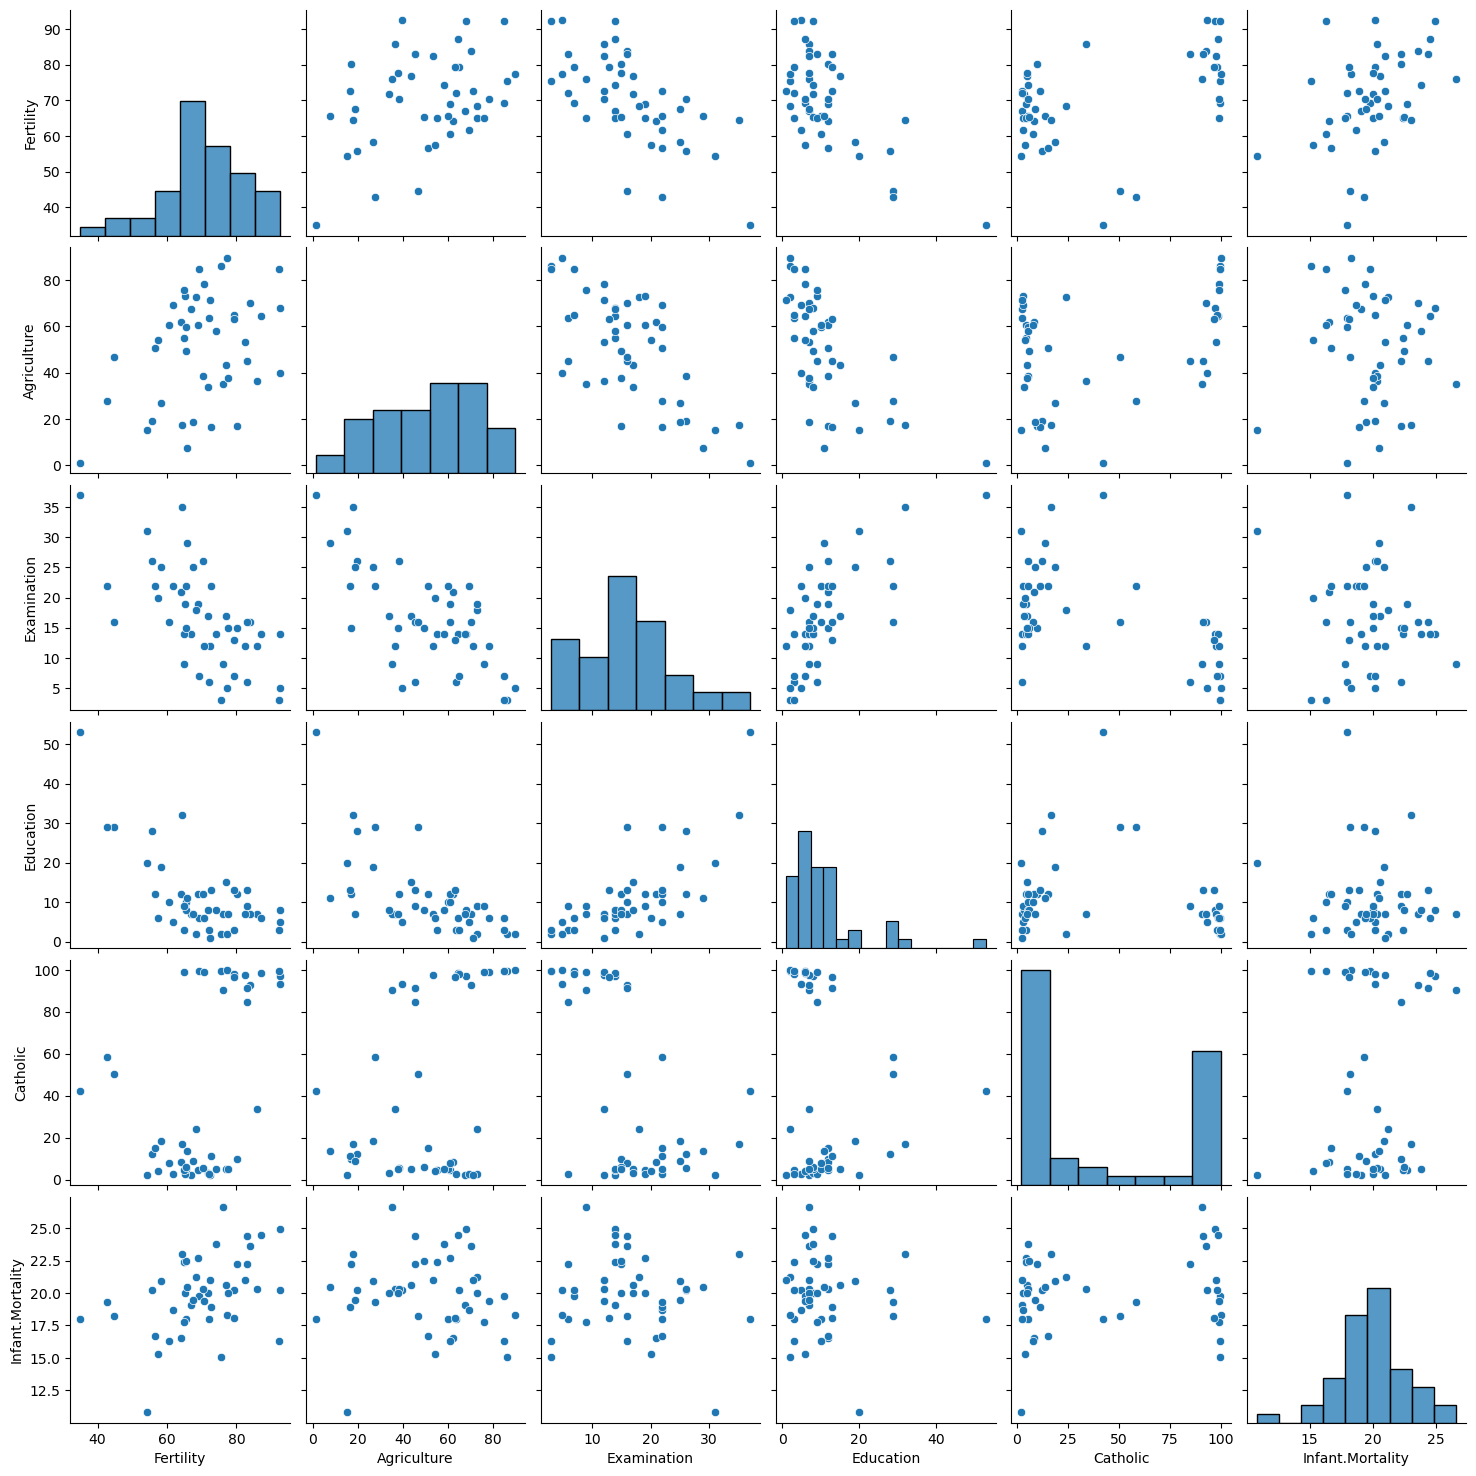

In [93]:
sb.pairplot(data=swiss)
plt.show()

In [94]:
swiss_nums= ['Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality']
target= ['Fertility']

In [95]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


In [96]:
#Split my data
train_val, test = train_test_split(tips, test_size=.2, random_state=123)
train, val = train_test_split(train_val, 
                                   test_size=.3, 
                                   random_state=123)

In [97]:
X_train= swiss.drop(columns=['Fertility']) 
y_train = swiss['Fertility']

In [98]:
select_kbest(X_train, y_train, 3)

Index(['Examination', 'Education', 'Catholic'], dtype='object')

In [99]:
rfe(X_train, y_train, 3)

Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')